## What are my Hypothesis?

1. The great white shark is the most lethal shark.
2. He likes to eat USA people more than anything, so he goes an extra mile to kill them.
3. He likes to eat surfers more than to eat swimmers.

## Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 

from matplotlib import cm
import re

import cufflinks as cf
import chart_studio.plotly as py
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

cf.set_config_file(sharing ="public", theme ="ggplot", offline = True)

In [2]:
GSAF = r"C:\Users\lenovo\Desktop\My_first_project\My_project\src\clean_sharks.csv"

df = pd.read_csv(GSAF, encoding = "ISO-8859-1")

## hipothesis: the great white shark is the most lethal shark and he likes to eat americans more than anything.
## Also, he likes to eat surfers more than to eat swimmers. I assume 
## the great white shark doesnt distinguish between australians, americans and new zealands. To him, they all taste the same.
## (because they all where british colonies)

### First, let's do some general plotting to see when the attacks happen.

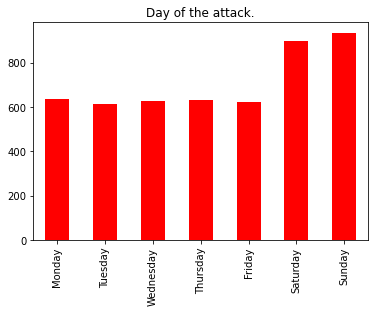

In [3]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
##i order it by days.

figura_1 = df["Day_of_week"].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='red', title= "Day of the attack.", sort_columns=True)

<AxesSubplot:title={'center':'Month of the attack.'}>

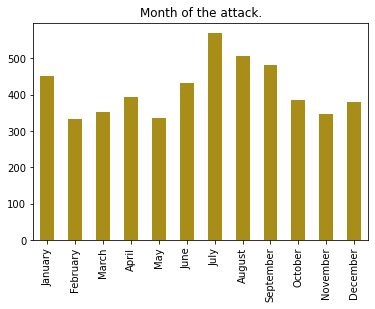

In [4]:
df["Month"].value_counts()[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]].plot(kind='bar', color ="#a98d19", title= "Month of the attack.", sort_columns=True)

## data in January is not real i assume i get some 01/01/1900 when they dont know when it happened. 

### Activities variable

What are the mains Activities during the attack?

In [5]:
df["Activity"].value_counts().iplot(kind="bar", color="blue", title="Main activity during the attack")

In [6]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'Case Number.1',
       'original order', 'Year_1900', 'New_dates', 'Final_dates',
       'Day_of_week', 'Month'],
      dtype='object')

### Type variable

Did the person deserved his life to end in the jaws of a shark?

In [7]:
Justice_fig = df["Type"].value_counts().iplot(kind="bar", title="The human deserved to die?")
Justice_fig

### FATALITY RATE

How many of the attacks end up in a confirmed kill, and how many the victim escape alive?

In [8]:
fatality_fig = df["Fatal (Y/N)"].value_counts().iplot(kind="bar", title= "Shark efficiency")
fatality_fig

### Species variable

Which shark species is the most aggressive? I don't care about fatality rate here, only total attacks.

In [9]:
species_fig = df["Species "].value_counts().iplot(kind="bar", title= "Most agressive shark species")
species_fig

### Country variable 

In which country most of the attacks take place?

In [10]:
country_fig = df["Country"].value_counts().iplot(kind="bar",color = "pink", title= "Country victim of the shark-terrorism")
country_fig

## Lets start with my hipothesis.

*Reminder: The sample i am using is not representative of the population because i have information only in 40% of the total data of the column species, the rest is lacking. Eitherway, we can conclude that the white shark is the most dangerous one.*

## 1. Is the Great White Shark the most lethal shark?

### Of course our favorite shark is the most agressive of all sharks...

In [11]:
Most_agressive_shark_fig = df["Species "].value_counts().iplot(kind="bar", title= "Most agressive shark species")
Most_agressive_shark_fig

### But is he the most efficient one?

In [12]:
alive = df[df["Fatal (Y/N)"] == "Barely alive"] ## create only survivers subsetb
dead = df[df["Fatal (Y/N)"] == "Fatal attack"] ## create only dead people subset

alive_byspecies = alive["Species "].value_counts()
dead_byspecies = dead["Species "].value_counts()
df["Fatal (Y/N)"].value_counts()

Barely alive    4095
Fatal attack     868
Name: Fatal (Y/N), dtype: int64

In [13]:
df["Fatal (Y/N)"].value_counts()

Barely alive    4095
Fatal attack     868
Name: Fatal (Y/N), dtype: int64

In [14]:
df_lethality = pd.concat([alive_byspecies, dead_byspecies], axis=1)
df_lethality.reset_index(inplace=True)
df_lethality.columns = ["Species ",'Barely Alive', 'Fatal Attack']
df_lethality

,Species,Barely Alive,Fatal Attack
0,Great white shark,469,141.0
1,Tiger shark,190,58.0
2,Bull shark,128,29.0
3,Blacktip shark,96,NaN
4,Bronze whaler shark,60,4.0
5,Grey shark,53,NaN
6,Mako shark,45,2.0
7,Wobbegong shark,43,NaN
8,Raggedtooth shark,41,NaN
9,Blue shark,37,8.0


In [15]:
fig_lethality = px.histogram(df_lethality, x="Species ", y=["Barely Alive","Fatal Attack"], title="Shark efficiency", barmode="group", text_auto=True)
fig_lethality.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig_lethality.add_annotation(x = 0, y = 510, text="White shark = 23% efficiency :)", showarrow=False) ## i add text hehe
fig_lethality.add_annotation(x = 2, y = 250, text="Tiger shark = 23% efficiency", showarrow=False) ## i add more text but now its less fun.
fig_lethality

## ITS A TIE!!! :(
In case of a tie, the shark with more kills wins. In this case, the great white shark is the savagest killer in the seas.



<img src="https://i.pinimg.com/originals/5b/d2/0c/5bd20c925e17f29e73ddaa4299766020.jpg" width="300" align="center">

Continuing with my hipotesis, let's see if he has a higher efficiency killing american people.

##  2. Is his favorite snack people from the USA?

<img src="https://preview.redd.it/jq5462t95ob51.jpg?auto=webp&s=339ec0cc1d0a696f3462449c9274eb25d007b04d" width="300" align="center"> 

I want to know where most of the attacks happens, and if that attack ends with a kill or not. I'm only interested in the great white shark attacks.

In [16]:
df_only_gws = df[df["Species "] == "Great white shark"] ## only our fav shark

In [17]:
alive = df_only_gws[df_only_gws["Fatal (Y/N)"] == "Barely alive"] ## create only survivers subsetb

In [18]:
alive_bycountry = alive["Country"].value_counts() ##create country and alive subset

In [19]:
dead = df_only_gws[df_only_gws["Fatal (Y/N)"] == "Fatal attack"] ## create only dead people subset

In [20]:
dead_bycountry = dead["Country"].value_counts() ## create country and dead

In [21]:
df_concat = pd.concat([alive_bycountry, dead_bycountry], axis=1, names = ["Barely Alive", "Fatal Attack"])
## concat 3 variables in 1 dataframe

In [22]:
df_concat.rename(columns = {'Country':'Barely Alive', 'Country':'Fatal Attack'}, inplace = True)
df_concat.rename(columns = {'Fatal Attack':'Barely Alive'}, inplace = True)
df_concat.columns = ['Barely Alive', 'Fatal Attack']

In [23]:
df_concat.reset_index(inplace=True) ## create country column

In [24]:
df_concat = df_concat.rename(columns = {'index':'Country'}) ## rename country column

In [25]:
figure_attack = px.histogram(df_concat, x="Country", y=["Barely Alive","Fatal Attack"], title="Did the human survive?",barmode="group", text_auto=True)
figure_attack.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
figure_attack

# He is more efficient OUTSIDE USA.

It seems he is a better killer outside USA. So my hipothesis was wrong.

Let's see now if the greatest shark in the sea likes to eat surfers more than to eat swimmers.

# 3. Surfers >>>>> Swimmers??

Let's take a look at the data of the victims of a Great White Shark attack.

<img src="https://c.tenor.com/ZmAnqvvODcYAAAAC/shark-sharky.gif" width="300" align="center"> 

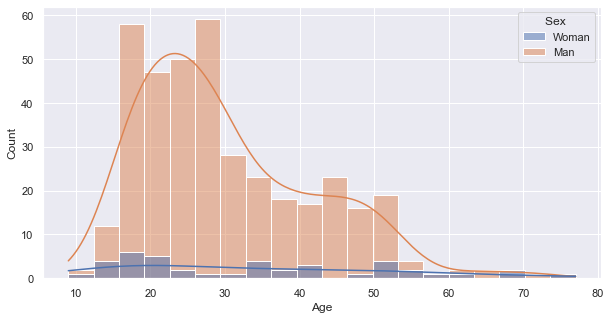

In [26]:
df_only_gws
sns.set(rc={"figure.figsize": (10.,5.)})
sns.histplot(data=df_only_gws, x="Age", hue="Sex ", bins=20, kde=True); ## sex and age of the victim during attack

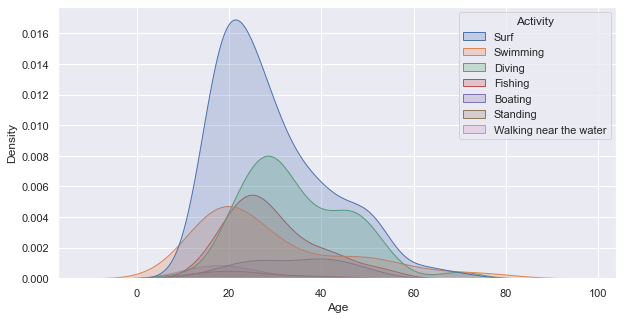

In [27]:
sns.kdeplot(data=df_only_gws, x="Age", hue="Activity", fill=True); ### activities and age done during attack

### We can see the goat dearest victim is a male surfer between 20-40 years old, but we need to see the eficiency too. Let's get a good boxplot to illustrate it.   

In [28]:
swimmers = df_only_gws[df_only_gws["Activity"] == "Swimming"]
surfers = df_only_gws[df_only_gws["Activity"] == "Surf"]

In [29]:
swimmers_deadoralive = swimmers["Fatal (Y/N)"].value_counts()
surfers_deadoralive = surfers["Fatal (Y/N)"].value_counts()

In [30]:
df_snack = pd.concat([swimmers_deadoralive, surfers_deadoralive], axis=1)
df_snack.reset_index(inplace=True)

df_snack.columns = ["Is the human alive?",'Swimmer', 'Surfer']


In [31]:
fig_snack = px.bar(df_snack, x= "Is the human alive?", y= ["Swimmer","Surfer"] , title="Favorite snack", barmode="group", text_auto=True)
fig_snack.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig_snack


## My hipotesis was wrong. Swimmers >>>> Surfers.

For reasons beyond our understanding, the favorite dish of the great white shark is the swimmers/swimmers of the sea.

<img src="https://media0.giphy.com/media/3oEduN3VLFK87V2XuM/giphy.gif?cid=790b7611f69e9de8a1dc4a961015b50aa347db162e23239b&rid=giphy.gif&ct=g" width="300" align="center">  

### Thanks for reading.